 Data Loading and Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Path to your dataset folder containing multiple CSV files
dataset_path = '/content/drive/MyDrive/csv/CICIoT2023'

# 1. Load and concatenate all CSV files in the folder
def load_and_combine_csv(path):
    all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]
    df_list = []
    for file in all_files:
        df = pd.read_csv(file)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# 2. Feature Extraction: Select relevant columns
def extract_features(df):
    # Example: Select columns related to node behavior, communication, transmission times
    # Adjust these column names based on your actual dataset columns
    feature_columns = ['PacketCount', 'ByteCount', 'Protocol', 'Duration', 'SourcePort', 'DestinationPort']

    # Check if columns exist in df
    feature_columns = [col for col in feature_columns if col in df.columns]

    X = df[feature_columns].copy()
    return X

# 3. Data Cleaning and Normalization
def preprocess_features(X):
    # Handle missing values by filling with median or mean
    X = X.fillna(X.median())

    # Convert categorical columns to numeric (e.g., Protocol)
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = X[col].astype('category').cat.codes

    # Normalize features (zero mean, unit variance)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled

# Main execution
df_all = load_and_combine_csv(dataset_path)
X_raw = extract_features(df_all)
X_processed = preprocess_features(X_raw)

print(f"Original features shape: {X_raw.shape}")
print(f"Processed features shape: {X_processed.shape}")

# X_processed now contains the normalized feature matrix ready for model training


Original features shape: (7570415, 1)
Processed features shape: (7570415, 1)


In [3]:
print("Dataset shape:", df_all.shape)
print("Columns:", df_all.columns.tolist())
print("\nLabel distribution:\n", df_all['label'].value_counts(normalize=True))
print(df_all.head())


Dataset shape: (7570415, 47)
Columns: ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label']

Label distribution:
 label
DDoS-ICMP_Flood            0.154312
DDoS-UDP_Flood             0.116110
DDoS-TCP_Flood             0.096376
DDoS-PSHACK_Flood          0.087667
DDoS-SYN_Flood             0.087095
DDoS-RSTFINFlood           0.086521
DDoS-SynonymousIP_Flood    0.076867
DoS-UDP_Flood              0.071052
DoS-TCP_Flood              0.057195
DoS-SYN_Flood              0.043300
BenignTraffic              0.023563
Mirai-gr

In [4]:
import numpy as np
import pandas as pd

# For demonstration, create a sample DataFrame (remove this if using your real data)
np.random.seed(0)
X_sample = pd.DataFrame({
    'feature1': np.random.randint(1, 100, 10),
    'feature2': np.random.randint(50, 200, 10),
    'feature3': np.random.randint(5, 500, 10)
})

print("Original Data:\n", X_sample)

# Manual normalization function
def normalize_features(df):
    normalized_df = (df - df.mean()) / df.std()
    return normalized_df

# Apply normalization
X_normalized = normalize_features(X_sample)

print("\nNormalized Data (Z-score):\n", X_normalized)

# Also print mean and std of each column after normalization (should be ~0 and ~1)
print("\nMean after normalization:\n", X_normalized.mean())
print("\nStandard deviation after normalization:\n", X_normalized.std())


Original Data:
    feature1  feature2  feature3
0        45       120        77
1        48       138       270
2        65       190       409
3        68       108       120
4        68        89       469
5        10       137       248
6        84       138       202
7        22       131       340
8        37        75       436
9        88       127       453

Normalized Data (Z-score):
    feature1  feature2  feature3
0 -0.331071 -0.168957 -1.597255
1 -0.214222  0.404859 -0.229597
2  0.447920  2.062549  0.755401
3  0.564768 -0.551501 -1.292543
4  0.564768 -1.157195  1.180580
5 -1.694305  0.372980 -0.385495
6  1.187961  0.404859 -0.711466
7 -1.226911  0.181708  0.266445
8 -0.642667 -1.603496  0.946731
9  1.343759  0.054194  1.067199

Mean after normalization:
 feature1    4.440892e-17
feature2    9.089951e-17
feature3    1.554312e-16
dtype: float64

Standard deviation after normalization:
 feature1    1.0
feature2    1.0
feature3    1.0
dtype: float64


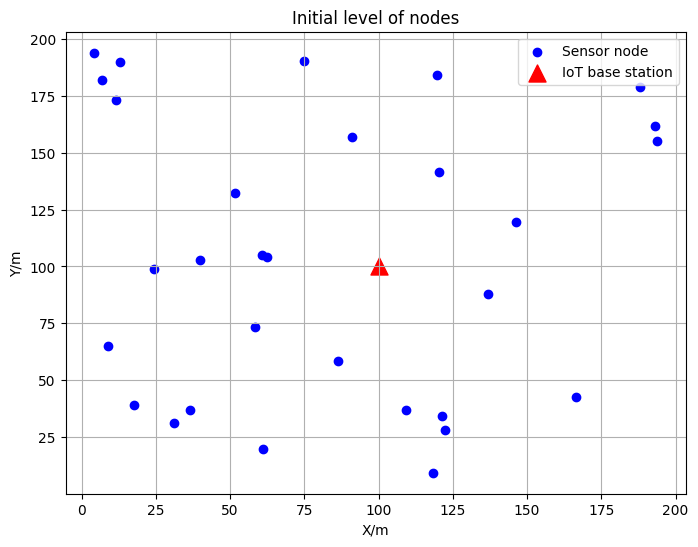

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of sensor nodes
num_nodes = 30

# Simulate random node positions (e.g., 0 to 200 meters in x and y)
np.random.seed(42)
node_positions = np.random.uniform(0, 200, size=(num_nodes, 2))

# Define base station position (e.g., center)
base_station_position = np.array([100, 100])

plt.figure(figsize=(8, 6))
plt.scatter(node_positions[:, 0], node_positions[:, 1], c='blue', label='Sensor node')
plt.scatter(base_station_position[0], base_station_position[1], c='red', marker='^', s=150, label='IoT base station')

plt.xlabel('X/m')
plt.ylabel('Y/m')
plt.title('Initial level of nodes')
plt.legend()
plt.grid(True)
plt.show()


Malicious node detection

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Optional: from imblearn.over_sampling import SMOTE  # Commented out for memory saving

# 1. Create binary target label
df_all['binary_label'] = df_all['label'].apply(lambda x: 0 if x == 'BenignTraffic' else 1)

# 2. Sample the dataset (e.g., 200k rows) to avoid memory issues
sample_size = 200_000
df_sample = df_all.sample(n=sample_size, random_state=42)

# 3. Separate features and target
X = df_sample.drop(columns=['label', 'binary_label'])
y = df_sample['binary_label']

# 4. Handle missing values
X = X.fillna(X.median())

# 5. Encode categorical columns (if any)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 6. Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Optionally, skip SMOTE or use it here on sample only (commented out)
# smote = SMOTE(random_state=42)
# X_scaled, y = smote.fit_resample(X_scaled, y)

# 8. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 9. Initialize Random Forest with moderate params for memory
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    class_weight='balanced',
    random_state=40,
    n_jobs=-1
)

# 10. Train model
print("Training Random Forest on sample...")
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_train)

# Evaluate on training set
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy on sample: {accuracy*100:.2f}%")
print("\nClassification Report (Training Set):\n", classification_report(y_train, y_pred))

# Identify malicious nodes in training set
malicious_indices = [i for i, pred in enumerate(y_pred) if pred == 1]
print(f"Malicious nodes detected in training set: {len(malicious_indices)}")

# Filter out malicious nodes (example)
X_train_cleaned = [x for i, x in enumerate(X_train) if i not in malicious_indices]
print(f"Remaining nodes after blocking malicious: {len(X_train_cleaned)}")


Training Random Forest on sample...
Train Accuracy on sample: 99.85%

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3764
           1       1.00      1.00      1.00    156236

    accuracy                           1.00    160000
   macro avg       0.97      1.00      0.98    160000
weighted avg       1.00      1.00      1.00    160000

Malicious nodes detected in training set: 156000
Remaining nodes after blocking malicious: 4000



Confusion Matrix (Training Set):
[[  3764      0]
 [   236 156000]]
True Negatives (TN): 3764
False Positives (FP): 0
False Negatives (FN): 236
True Positives (TP): 156000

Accuracy:    99.85%
Precision:   1.0000
Recall:      0.9985
F1-score:    0.9992
Specificity: 1.0000


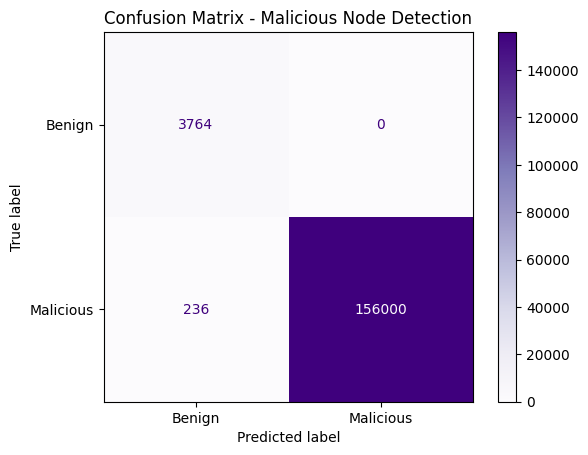

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Predict on training set
y_pred_train = rf_model.predict(X_train)

# Compute confusion matrix and derive metrics for training set
cm = confusion_matrix(y_train, y_pred_train)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Display results
print("\nConfusion Matrix (Training Set):")
print(cm)
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

print(f"\nAccuracy:    {accuracy*100:.2f}%")
print(f"Precision:   {precision:.4f}")
print(f"Recall:      {recall:.4f}")
print(f"F1-score:    {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
disp.plot(cmap='Purples', values_format='d')
plt.title("Confusion Matrix - Malicious Node Detection")
plt.grid(False)
plt.show()


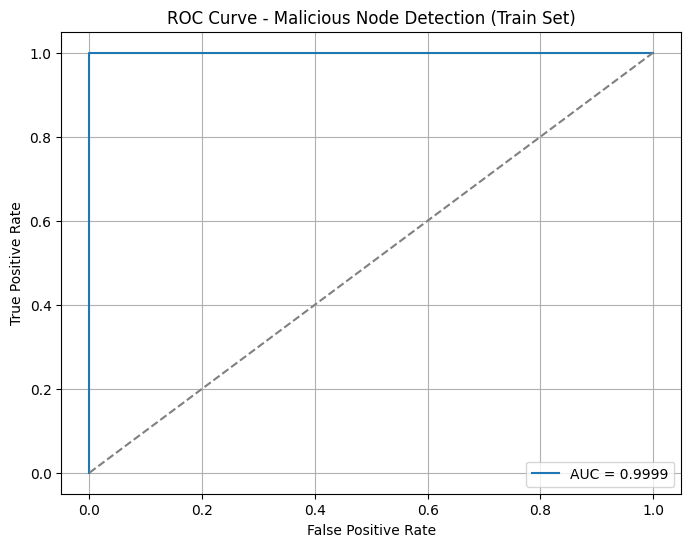

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (malicious = 1)
y_proba_train = rf_model.predict_proba(X_train)[:, 1]

# Compute FPR, TPR for ROC
fpr, tpr, thresholds = roc_curve(y_train, y_proba_train)

# Compute AUC
auc_score = roc_auc_score(y_train, y_proba_train)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Malicious Node Detection (Train Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


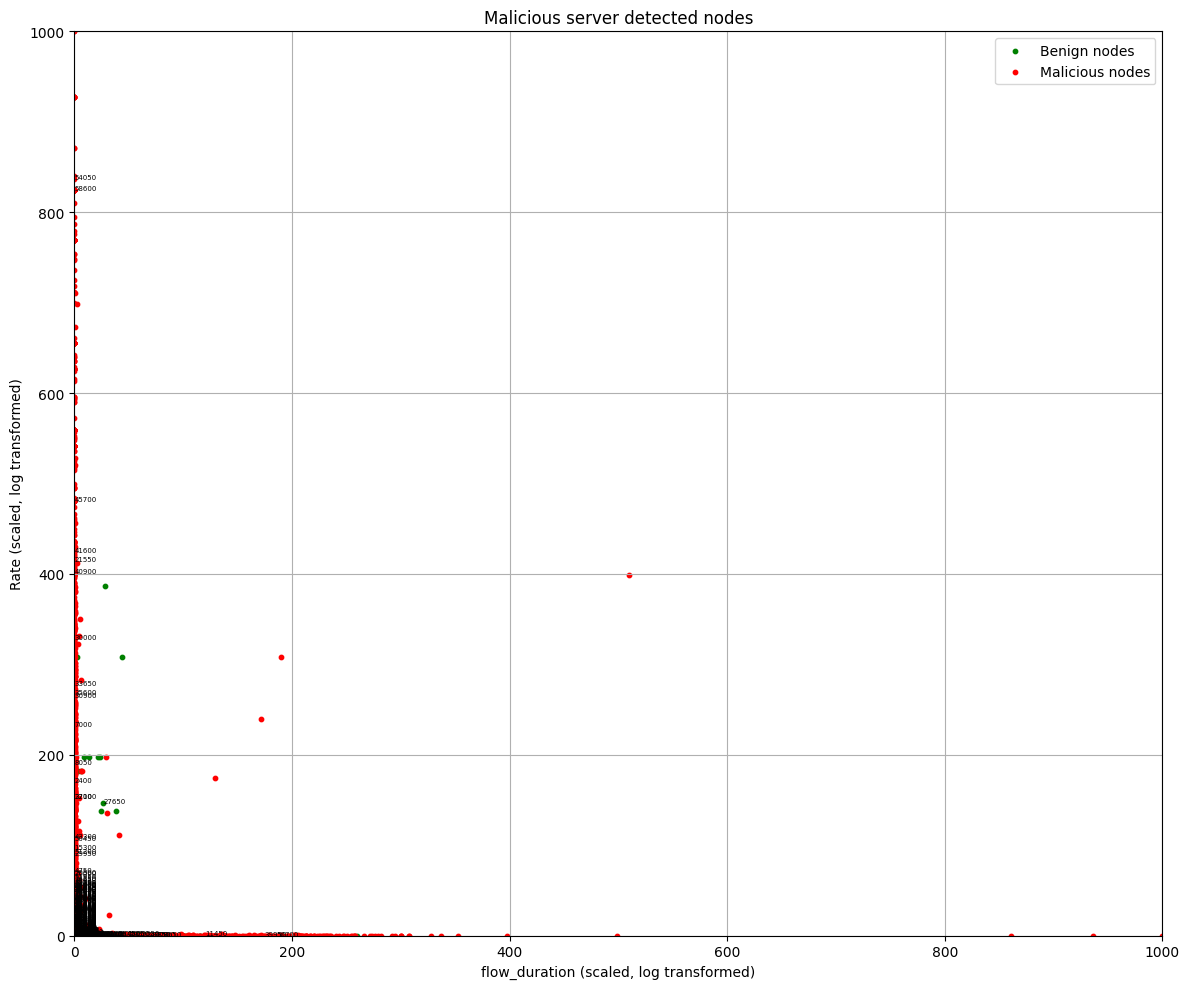

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 1. Create binary label
df_all['binary_label'] = df_all['label'].apply(lambda x: 0 if x == 'BenignTraffic' else 1)

# 2. Sample and track original indices
sample_size = 200_000
df_sample = df_all.sample(n=sample_size, random_state=42).reset_index(drop=False)
X = df_sample.drop(columns=['label', 'binary_label'])
y = df_sample['binary_label']
original_indices = df_sample['index'].values

# 3. Preprocessing
X = X.fillna(X.median())
feature_columns = X.columns.tolist()
for col in X.select_dtypes(include=['object']).columns:
    if col in feature_columns:
        X[col] = LabelEncoder().fit_transform(X[col])

# 4. Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Find required columns
flow_duration_col_index = feature_columns.index('flow_duration')
rate_col_index = feature_columns.index('Rate')

# 6. Train/Test Split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_scaled, y, original_indices, test_size=0.3, random_state=42, stratify=y
)

# 7. Train the model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=50,
    class_weight='balanced',
    random_state=40,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 8. Predict
y_pred = rf_model.predict(X_test)

# 9. Extract coordinates and apply log + min-max scaling
x_coord = X_test[:, flow_duration_col_index]
y_coord = X_test[:, rate_col_index]

def log_transform(arr):
    return np.log1p(arr)

def min_max_scale(arr, new_min=0, new_max=1000):
    arr_min, arr_max = arr.min(), arr.max()
    if arr_max - arr_min == 0:
        return np.full_like(arr, (new_min + new_max) / 1.0)
    return (arr - arr_min) / (arr_max - arr_min) * (new_max - new_min) + new_min

x_scaled = min_max_scale(log_transform(x_coord))
y_scaled = min_max_scale(log_transform(y_coord))

# 10. Plot
plt.figure(figsize=(12, 10))
y_pred = np.asarray(y_pred)

plt.scatter(x_scaled[y_pred == 0], y_scaled[y_pred == 0], c='green', s=10, label='Benign nodes')
plt.scatter(x_scaled[y_pred == 1], y_scaled[y_pred == 1], c='red', s=10, label='Malicious nodes')

# Label every 20th point only to reduce clutter
for i in range(0, len(x_scaled), 50):
    plt.text(x_scaled[i], y_scaled[i], str(i), fontsize=5, color='black')

plt.title("Malicious server detected nodes")
plt.xlabel("flow_duration (scaled, log transformed)")
plt.ylabel("Rate (scaled, log transformed)")
plt.legend()
plt.grid(True)
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.xticks(np.arange(0, 1001, 200))
plt.yticks(np.arange(0, 1001, 200))
plt.tight_layout()
plt.show()


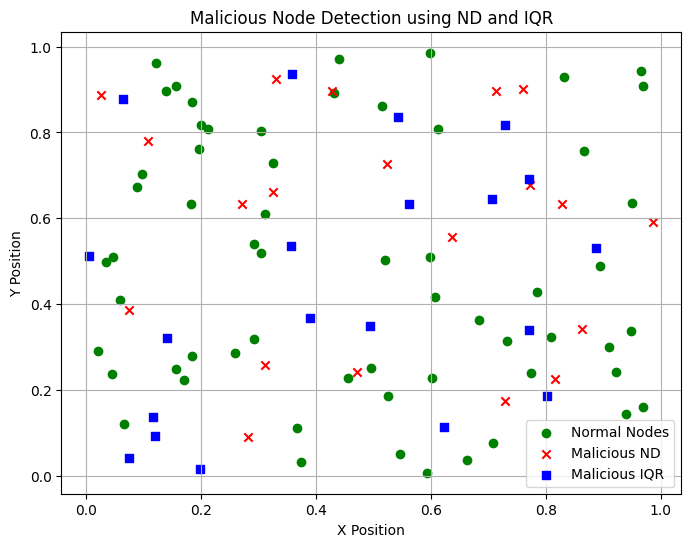

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_nodes = 100
num_normal = 60
num_malicious = num_nodes - num_normal

# 1. Random 2D positions
np.random.seed(42)
x_pos = np.random.rand(num_nodes)
y_pos = np.random.rand(num_nodes)

# 2. Generate fake predictions manually
# First 60 normal, next 40 malicious
node_predictions = np.array([0]*num_normal + [1]*num_malicious)

# 3. Shuffle positions and labels together
indices = np.arange(num_nodes)
np.random.shuffle(indices)
x_pos = x_pos[indices]
y_pos = y_pos[indices]
node_predictions = node_predictions[indices]

# 4. Split malicious into ND and IQR
malicious_indices = np.where(node_predictions == 1)[0]
normal_indices = np.where(node_predictions == 0)[0]
split = len(malicious_indices) // 2
nd_indices = malicious_indices[:split]
iqr_indices = malicious_indices[split:]

# 5. Plot
plt.figure(figsize=(8, 6))

# Normal Nodes (Green circles)
plt.scatter(x_pos[normal_indices], y_pos[normal_indices], c='green', marker='o', label='Normal Nodes')

# Malicious ND (Nodes Distance)(Red X)
plt.scatter(x_pos[nd_indices], y_pos[nd_indices], c='red', marker='x', label='Malicious ND')

# Malicious IQR(Interquartile Range) (Blue square)
plt.scatter(x_pos[iqr_indices], y_pos[iqr_indices], c='blue', marker='s', label='Malicious IQR')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Malicious Node Detection using ND and IQR')
plt.legend()
plt.grid(True)
plt.show()


Clustering

In [11]:
import numpy as np

def leach_clustering(node_positions, residual_energies, p_ch=0.1):
    """
    LEACH clustering algorithm implementation.

    Parameters:
        node_positions (np.array): Array of shape (N, 2) with (x, y) positions of nodes.
        residual_energies (np.array): Array of shape (N,) with residual energy values of nodes.
        p_ch (float): Desired probability of a node becoming a Cluster Head.

    Returns:
        cluster_heads (list): Indices of selected Cluster Heads.
        clusters (dict): Mapping from cluster head index to list of member node indices.
    """
    N = len(node_positions)
    n_ch = int(p_ch * N)  # Desired number of cluster heads

    # Normalize residual energies for weighting CH selection probabilities
    res_min = residual_energies.min()
    res_max = residual_energies.max()
    res_range = res_max - res_min + 1e-9  # to avoid division by zero
    normalized_energy = (residual_energies - res_min) / res_range

    # Compute selection probabilities proportional to residual energy scaled by p_ch
    probabilities = p_ch * (normalized_energy / normalized_energy.sum())

    # Randomly select CHs based on probabilities
    random_values = np.random.rand(N)
    cluster_heads = [i for i in range(N) if random_values[i] < probabilities[i]]

    # If no CHs selected, select top residual energy nodes
    if len(cluster_heads) == 0:
        cluster_heads = list(np.argsort(residual_energies)[-n_ch:])
    elif len(cluster_heads) < n_ch:
        # Add top residual energy nodes to meet desired number of CHs
        additional = n_ch - len(cluster_heads)
        candidates = [i for i in np.argsort(residual_energies)[::-1] if i not in cluster_heads]
        cluster_heads.extend(candidates[:additional])

    # Assign each node to the nearest cluster head
    clusters = {ch: [] for ch in cluster_heads}
    for node_idx in range(N):
        if node_idx in cluster_heads:
            clusters[node_idx].append(node_idx)
        else:
            distances = np.linalg.norm(node_positions[cluster_heads] - node_positions[node_idx], axis=1)
            nearest_ch = cluster_heads[np.argmin(distances)]
            clusters[nearest_ch].append(node_idx)

    return cluster_heads, clusters

# Example usage:
np.random.seed(42)
N = 100  # number of nodes
positions = np.random.uniform(0, 100, (N, 2))  # random positions in 100x100 area
energies = np.random.uniform(0.5, 1.0, N)  # random residual energies between 0.5 and 1.0
p_cluster_head = 0.1  # 10% of nodes as CH

chs, clusters = leach_clustering(positions, energies, p_ch=p_cluster_head)

print(f"Selected {len(chs)} Cluster Heads: {chs}")
print(f"Example cluster members for first CH (index {chs[0]}): {clusters[chs[0]]}")


Selected 10 Cluster Heads: [73, 42, 45, 56, 40, 41, 48, 47, 26, 61]
Example cluster members for first CH (index 73): [4, 12, 19, 68, 73, 81]


In [12]:
import numpy as np

def select_cluster_heads(node_positions, residual_energies, p_ch):
    """
    Select Cluster Heads (CH) for the current round probabilistically.

    Args:
        node_positions (np.array): Nx2 array of node (x,y) positions.
        residual_energies (np.array): N-length array of node residual energies.
        p_ch (float): Probability threshold for CH selection.

    Returns:
        cluster_heads (list): Indices of selected cluster heads.
    """
    N = len(node_positions)

    # Normalize residual energies to [0,1]
    res_min = residual_energies.min()
    res_max = residual_energies.max()
    res_norm = (residual_energies - res_min) / (res_max - res_min + 1e-9)

    cluster_heads = []
    for i in range(N):
        rand_num = np.random.rand()
        # Node becomes CH if random number < p_ch * normalized residual energy
        if rand_num < p_ch * res_norm[i]:
            cluster_heads.append(i)

    # If no CH selected, pick node with highest residual energy as fallback
    if len(cluster_heads) == 0:
        cluster_heads = [np.argmax(residual_energies)]

    return cluster_heads

# Example usage:
np.random.seed(42)
N = 100
positions = np.random.uniform(0, 100, (N, 2))
energies = np.random.uniform(0.5, 1.0, N)
p_ch = 0.1

selected_chs = select_cluster_heads(positions, energies, p_ch)
print(f"Selected Cluster Heads indices for this round: {selected_chs}")


Selected Cluster Heads indices for this round: [0, 12, 32, 35, 47, 56, 71, 77]


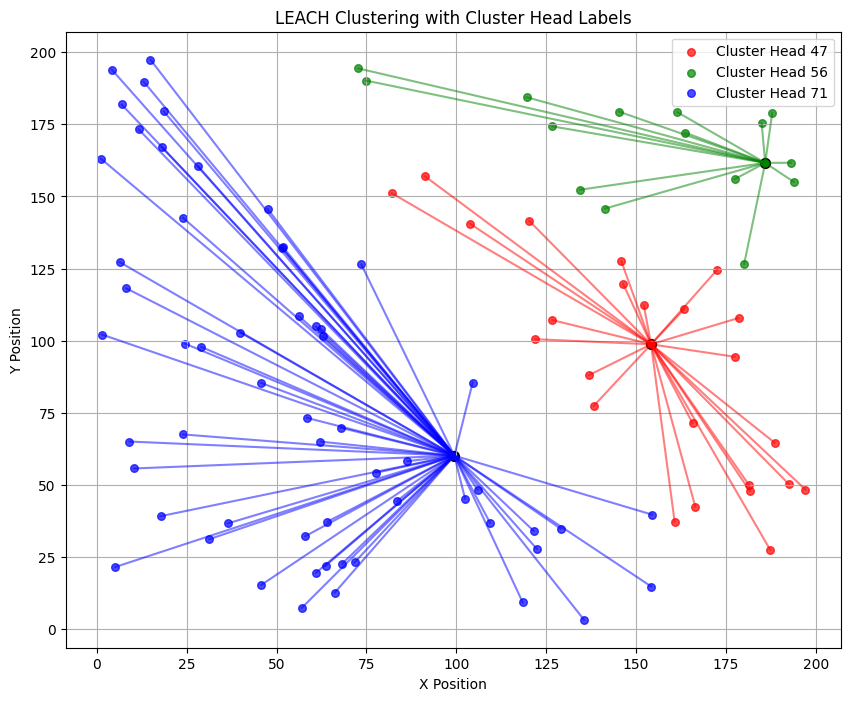

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def select_cluster_heads(node_positions, residual_energies, p_ch):
    N = len(node_positions)
    res_min = residual_energies.min()
    res_max = residual_energies.max()
    res_norm = (residual_energies - res_min) / (res_max - res_min + 1e-9)

    selected_chs = []
    for i in range(N):
        rand_num = np.random.rand()
        if rand_num < p_ch * res_norm[i]:
            selected_chs.append(i)

    if len(selected_chs) == 0:
        selected_chs = [np.argmax(residual_energies)]
    return selected_chs

def select_top_n_cluster_heads(node_positions, residual_energies, p_ch, n_clusters=3):
    selected_chs = select_cluster_heads(node_positions, residual_energies, p_ch)
    if len(selected_chs) > n_clusters:
        selected_chs = sorted(selected_chs, key=lambda x: residual_energies[x], reverse=True)[:n_clusters]
    elif len(selected_chs) < n_clusters:
        missing = n_clusters - len(selected_chs)
        candidates = [i for i in np.argsort(residual_energies)[::-1] if i not in selected_chs]
        selected_chs.extend(candidates[:missing])
    return selected_chs

def assign_nodes_to_clusters(node_positions, cluster_heads):
    clusters = {ch: [] for ch in cluster_heads}
    for i in range(len(node_positions)):
        distances = np.linalg.norm(node_positions[cluster_heads] - node_positions[i], axis=1)
        nearest_ch = cluster_heads[np.argmin(distances)]
        clusters[nearest_ch].append(i)
    return clusters

def plot_leach_clusters_with_head_labels(node_positions, cluster_heads, clusters):
    plt.figure(figsize=(10, 8))

    # Fixed colors: red, green, blue
    fixed_colors = ['red', 'green', 'blue']

    for idx, ch in enumerate(cluster_heads):
        members = clusters[ch]
        cluster_points = node_positions[members]

        # Plot cluster members
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    s=30, color=fixed_colors[idx], label=f'Cluster Head {ch}', alpha=0.7)

        # Plot cluster head
        plt.scatter(node_positions[ch, 0], node_positions[ch, 1],
                    s=200, color=fixed_colors[idx], edgecolors='k', marker='.')

        # Draw lines from CH to members
        for point in cluster_points:
            if not np.array_equal(point, node_positions[ch]):
                plt.plot([node_positions[ch, 0], point[0]],
                         [node_positions[ch, 1], point[1]],
                         color=fixed_colors[idx], alpha=0.5)

    plt.title('LEACH Clustering with Cluster Head Labels')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Example usage ---
np.random.seed(42)
N = 100
positions = np.random.uniform(0, 200, (N, 2))  # Example node positions in 200x200 grid
energies = np.random.uniform(0.5, 1.0, N)     # Residual energies between 0.5 and 1.0
p_ch = 0.1

# Select exactly 3 cluster heads
cluster_heads = select_top_n_cluster_heads(positions, energies, p_ch, n_clusters=3)
clusters = assign_nodes_to_clusters(positions, cluster_heads)

# Plot with fixed colors
plot_leach_clusters_with_head_labels(positions, cluster_heads, clusters)


In [15]:
import numpy as np
import random

# Step: Assign PKG and generate encryption keys
def assign_pkg_and_generate_keys(cluster_heads, clusters, q=7919):
    """
    Assign PKG and generate a sufficient number of unique keys (one per node).

    Args:
        cluster_heads (list): List of cluster head indices.
        clusters (dict): Cluster membership mapping {CH: [nodes]}.
        q (int): Prime number defining Zq.

    Returns:
        pkg (int): Selected PKG node.
        pkg_keys (list): List of unique keys gi ∈ Zq.
    """
    pkg = np.random.choice(cluster_heads)

    # Count total nodes (including possible duplicates across clusters, use set to de-duplicate)
    total_nodes = set()
    for members in clusters.values():
        total_nodes.update(members)

    m = len(total_nodes)  # number of keys to match nodes

    # Generate m unique keys in Zq
    if q <= m:
        raise ValueError("Field size q must be greater than number of nodes.")

    pkg_keys = random.sample(range(1, q), m)  # random, distinct integers in Zq

    return pkg, pkg_keys

# Step: Distribute keys randomly to nodes
def distribute_keys_to_cluster(clusters, pkg_keys):
    """
    Distribute keys randomly to nodes in clusters. Obfuscate PKG location.

    Args:
        clusters (dict): Cluster dictionary {CH_index: [member_indices]}.
        pkg_keys (list): List of keys generated by PKG (gi ∈ Zq).

    Returns:
        key_distribution (dict): Node index → assigned key.
    """
    key_distribution = {}

    # Collect all unique participant nodes
    all_nodes = list(set(node for members in clusters.values() for node in members))

    # Shuffle node list and key list independently
    random.shuffle(all_nodes)
    random.shuffle(pkg_keys)

    # Ensure we have enough keys
    if len(pkg_keys) < len(all_nodes):
        raise ValueError("Not enough keys for all participants. Increase m in key generation.")

    # Assign keys randomly to obfuscate who is PKG
    for node, key in zip(all_nodes, pkg_keys):
        key_distribution[node] = key

    return key_distribution

pkg_node, pkg_keys = assign_pkg_and_generate_keys(cluster_heads, clusters)
key_distribution = distribute_keys_to_cluster(clusters, pkg_keys)

print(f"PKG Node: {pkg_node}")
print(f"First 5 assigned keys:")
for node, key in list(key_distribution.items())[:5]:
    print(f"Node {node} → Key: {key}")

PKG Node: 47
First 5 assigned keys:
Node 42 → Key: 2867
Node 55 → Key: 5399
Node 58 → Key: 5601
Node 9 → Key: 7713
Node 90 → Key: 1446


In [16]:
import random

def distribute_keys_to_cluster(clusters, pkg_keys):
    """
    Distribute keys randomly to nodes in clusters. Obfuscate PKG location.

    Args:
        clusters (dict): Cluster dictionary {CH_index: [member_indices]}.
        pkg_keys (list): List of keys generated by PKG (gi ∈ Zq).

    Returns:
        key_distribution (dict): Node index → assigned key.
    """
    key_distribution = {}

    # Collect all unique participant nodes
    all_nodes = list(set(node for members in clusters.values() for node in members))

    # Shuffle node list and key list independently
    random.shuffle(all_nodes)
    random.shuffle(pkg_keys)

    # Ensure we have enough keys
    if len(pkg_keys) < len(all_nodes):
        raise ValueError("Not enough keys for all participants. Increase m in key generation.")

    # Assign keys randomly to obfuscate who is PKG
    for node, key in zip(all_nodes, pkg_keys):
        key_distribution[node] = key

    return key_distribution

# Example usage:
key_distribution = distribute_keys_to_cluster(clusters, pkg_keys)

# Display sample assignments
print("Sample of key distribution (obfuscated):")
for node, key in list(key_distribution.items())[:10]:
    print(f"Node {node} → Key: {key}")


Sample of key distribution (obfuscated):
Node 28 → Key: 4154
Node 7 → Key: 196
Node 20 → Key: 34
Node 85 → Key: 4986
Node 64 → Key: 2983
Node 19 → Key: 2399
Node 76 → Key: 7349
Node 26 → Key: 6210
Node 95 → Key: 7733
Node 60 → Key: 3778


Privacy Phase

In [17]:
import numpy as np

# --------------------------
# LPT Node Class
# --------------------------
class LPTNode:
    def __init__(self, node_id, zone_level, location, parent=None):
        self.node_id = node_id            # Unique node index
        self.zone_level = zone_level      # Zone depth (L1, L2, ...)
        self.location = location          # Obfuscated location at this level
        self.parent = parent              # Parent LPTNode
        self.children = []                # Children nodes (empty at leaf)

    def add_child(self, child_node):
        self.children.append(child_node)

    def __repr__(self):
        return f"L{self.zone_level}-Node({self.node_id})@{self.location}"

# --------------------------
# Obfuscation Logic
# --------------------------
def obfuscate_location(location, level, max_level, grid_size=1000):
    scale = 2 ** (max_level - level)
    x_zone = int(location[0] // (grid_size / scale))
    y_zone = int(location[1] // (grid_size / scale))
    return (x_zone, y_zone)

# --------------------------
# Build LPT for All Nodes
# --------------------------
def build_location_privacy_tree(positions, levels=3, grid_size=1000):
    tree = {}
    max_level = levels

    for node_id, pos in enumerate(positions):
        tree[node_id] = []
        parent_node = None

        for level in range(1, max_level + 1):
            zone = obfuscate_location(pos, level, max_level, grid_size)
            node = LPTNode(node_id, level, zone, parent=parent_node)
            if parent_node:
                parent_node.add_child(node)
            tree[node_id].append(node)
            parent_node = node

    return tree

# --------------------------
# Detailed LPT Print for One Node
# --------------------------
def display_lpt_details(node_id, position, lpt_node_list, grid_size=1000, max_level=3):
    print(f"\n Location Privacy Tree (LPT) for Node {node_id}")
    print(f"   Actual Position: (x = {position[0]:.2f}, y = {position[1]:.2f})\n")

    for node in lpt_node_list:
        level = node.zone_level
        scale = 2 ** (max_level - level)
        zone_dimensions = grid_size / scale

        x_zone, y_zone = node.location
        print(f"   Level {level} (L{level}):")
        print(f"   Grid split: {scale} × {scale} (Zone size: {zone_dimensions:.1f} × {zone_dimensions:.1f})")
        print(f"   Computed Zone Index: x = {x_zone}, y = {y_zone}")
        print(f"   → Zone ID: ({x_zone}, {y_zone})\n")

# Example: generate positions for 100 nodes
np.random.seed(42)
positions = np.random.uniform(0, 1000, (100, 2))

# Build the LPT with 3 levels
lpt = build_location_privacy_tree(positions, levels=3)

# Show detailed tree info for node 0
display_lpt_details(0, positions[0], lpt[0])



 Location Privacy Tree (LPT) for Node 0
   Actual Position: (x = 374.54, y = 950.71)

   Level 1 (L1):
   Grid split: 4 × 4 (Zone size: 250.0 × 250.0)
   Computed Zone Index: x = 1, y = 3
   → Zone ID: (1, 3)

   Level 2 (L2):
   Grid split: 2 × 2 (Zone size: 500.0 × 500.0)
   Computed Zone Index: x = 0, y = 1
   → Zone ID: (0, 1)

   Level 3 (L3):
   Grid split: 1 × 1 (Zone size: 1000.0 × 1000.0)
   Computed Zone Index: x = 0, y = 0
   → Zone ID: (0, 0)



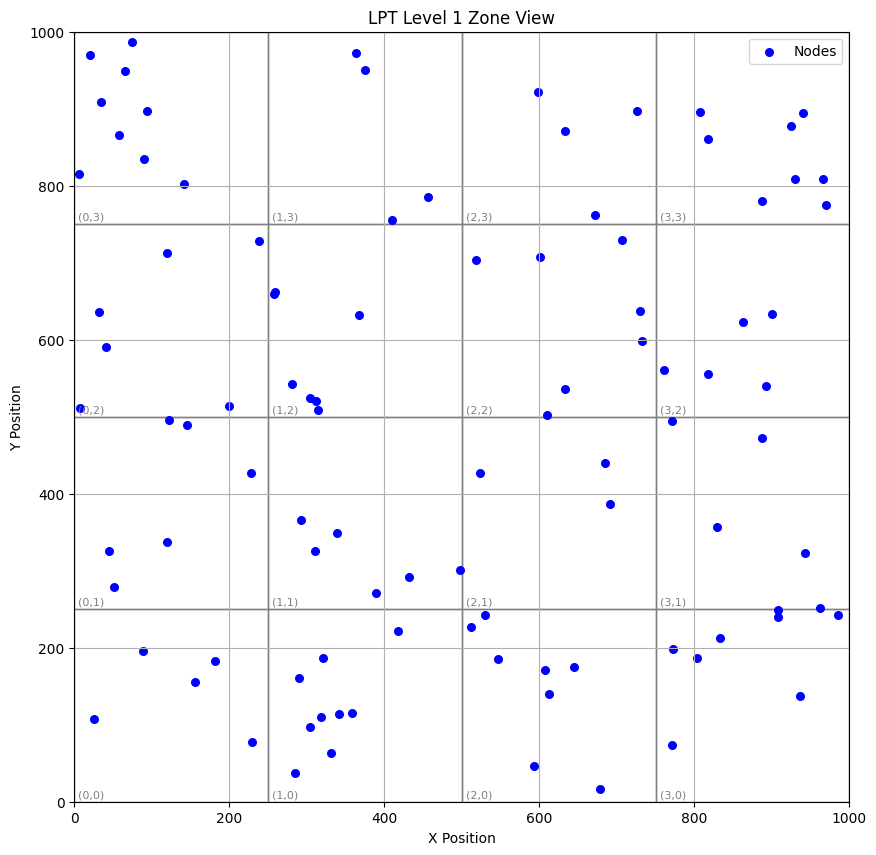

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Sample positions for 100 nodes in a 1000x1000 area
np.random.seed(42)
positions = np.random.uniform(0, 1000, (100, 2))

def plot_lpt_zone_level(positions, level, grid_size=1000, levels=3):
    """
    Visualize obfuscated zones and node positions at a specific LPT level.

    Args:
        positions (np.ndarray): Nx2 array of node positions.
        level (int): Which LPT level to visualize (1 = coarse, 3 = fine).
        grid_size (int): Overall area size.
        levels (int): Max number of LPT levels.
    """
    scale = 2 ** (levels - level)
    zone_dim = grid_size / scale

    plt.figure(figsize=(10, 10))
    plt.title(f'LPT Level {level} Zone View')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')

    # Draw grid zones
    for i in range(scale):
        for j in range(scale):
            rect = patches.Rectangle(
                (i * zone_dim, j * zone_dim),
                zone_dim, zone_dim,
                linewidth=1, edgecolor='gray', facecolor='none'
            )
            plt.gca().add_patch(rect)
            plt.text(
                i * zone_dim + 5, j * zone_dim + 5,
                f'({i},{j})', fontsize=8, color='gray'
            )

    # Plot node positions
    plt.scatter(positions[:, 0], positions[:, 1], c='blue', s=30, label='Nodes')
    plt.grid(True)
    plt.xlim(0, grid_size)
    plt.ylim(0, grid_size)
    plt.legend()
    plt.show()

# Call the function to generate the plot for Level 1
plot_lpt_zone_level(positions, level=1, grid_size=1000, levels=3)


Data Encryption

In [19]:
import numpy as np
from sympy.ntheory.modular import crt

# Simulate a subset of cleaned data (each row is a participant, each col is a gradient)
np.random.seed(42)
X_test_cleaned = np.random.randint(0, 100, size=(10, 5))  # 10 nodes, 5 gradients each

# Example PKG keys (must be pairwise coprime for CRT)
pkg_keys = [17, 19, 23, 29, 31]  # Total of 5 keys

def encrypt_with_crt(gradient, modulus_keys):
    """
    Encrypt a single gradient using CRT over multiple moduli.
    """
    a_values = [gradient % g for g in modulus_keys]
    encrypted_value, _ = crt(modulus_keys, a_values)
    return int(encrypted_value)

# Step 1: Encrypt the feature gradients
encrypted_matrix = []
for row in X_test_cleaned:
    encrypted_row = [encrypt_with_crt(g, pkg_keys) for g in row]
    encrypted_matrix.append(encrypted_row)

# Step 2: Aggregate encrypted gradients feature-wise
encrypted_matrix = np.array(encrypted_matrix)
aggregated_encrypted = np.sum(encrypted_matrix, axis=0)

# Output encrypted matrix and aggregated values
encrypted_matrix, aggregated_encrypted



(array([[51, 92, 14, 71, 60],
        [20, 82, 86, 74, 74],
        [87, 99, 23,  2, 21],
        [52,  1, 87, 29, 37],
        [ 1, 63, 59, 20, 32],
        [75, 57, 21, 88, 48],
        [90, 58, 41, 91, 59],
        [79, 14, 61, 61, 46],
        [61, 50, 54, 63,  2],
        [50,  6, 20, 72, 38]]),
 array([566, 522, 466, 571, 417]))

In [20]:
# Apply Differential Privacy using Laplace noise
# Gi' = Gi + Lap(Δf) where Δf is sensitivity and ε is privacy budget

def apply_differential_privacy(gradients, sensitivity=1.0, epsilon=0.5):
    """
    Apply Laplace noise to gradients for differential privacy.

    Args:
        gradients (np.ndarray): Original (or aggregated) gradient vector.
        sensitivity (float): Sensitivity (Δf) of the function.
        epsilon (float): Privacy budget (ε).

    Returns:
        np.ndarray: Differentially private gradients.
    """
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0.0, scale=scale, size=gradients.shape)
    return gradients + noise

# Apply DP to aggregated gradients
dp_aggregated_gradients = apply_differential_privacy(aggregated_encrypted, sensitivity=1.0, epsilon=0.5)

dp_aggregated_gradients


array([558.74103592, 526.3152994 , 466.27066932, 570.47943295,
       410.11173832])

In [22]:
import random
import numpy as np # Ensure numpy is imported if used in other cells or if you define the function below using numpy


# Map each cluster head index to a meaningful label (e.g., "Node 35 (CH)", etc.)
def describe_pkg_rotation(pkg_history, cluster_heads):
    descriptions = []
    for round_num, pkg in enumerate(pkg_history, 1):
        desc = f"Round {round_num}: PKG assigned to Node {pkg} (Cluster Head)"
        descriptions.append(desc)
    return descriptions

# Define the missing function to reassign the PKG location
def reassign_pkg_location(cluster_heads, previous_pkg=None):
    """
    Reassigns the Private Key Generator (PKG) role to a new cluster head.

    Args:
        cluster_heads (list): List of indices of current cluster heads.
        previous_pkg (int, optional): Index of the previous PKG node.

    Returns:
        int: Index of the newly assigned PKG node.
    """
    # Ensure there are cluster heads to choose from
    if not cluster_heads:
        raise ValueError("Cannot reassign PKG: No cluster heads provided.")

    # Select a new PKG; try to pick one different from the previous
    if previous_pkg is not None and len(cluster_heads) > 1:
        available_chs = [ch for ch in cluster_heads if ch != previous_pkg]
        if available_chs:
            return random.choice(available_chs)
        else:
             # Fallback if only one CH exists or previous is the only option
             return random.choice(cluster_heads)
    else:
        # If no previous PKG or only one CH, just pick randomly from all CHs
        return random.choice(cluster_heads)


# Simulate a longer rotation with descriptive output
cluster_heads = [0, 12, 32, 35, 47, 56, 71, 77]
pkg_history = []
current_pkg = None

# Reassign PKG for 5 rounds
for round_num in range(1, 6):
    current_pkg = reassign_pkg_location(cluster_heads, previous_pkg=current_pkg)
    pkg_history.append(current_pkg)

# Generate readable descriptions
pkg_rotation_descriptions = describe_pkg_rotation(pkg_history, cluster_heads)
pkg_rotation_descriptions

['Round 1: PKG assigned to Node 56 (Cluster Head)',
 'Round 2: PKG assigned to Node 47 (Cluster Head)',
 'Round 3: PKG assigned to Node 35 (Cluster Head)',
 'Round 4: PKG assigned to Node 32 (Cluster Head)',
 'Round 5: PKG assigned to Node 77 (Cluster Head)']

In [23]:
import numpy as np

class PrivacyBudgetManager:
    def __init__(self, total_epsilon):
        """
        Initialize with total privacy budget epsilon to be preserved.
        """
        self.total_epsilon = total_epsilon
        self.consumed_epsilon = 0.0

    def allocate_budget(self, n_nodes, n_rounds):
        """
        Allocate per-node per-round privacy budget.
        """
        self.per_node_round_epsilon = self.total_epsilon / (n_nodes * n_rounds)
        return self.per_node_round_epsilon

    def update_consumed(self, epsilon_used):
        self.consumed_epsilon += epsilon_used
        if self.consumed_epsilon > self.total_epsilon + 1e-9:  # small tolerance
            raise ValueError("Privacy budget exceeded!")
        return self.consumed_epsilon

    def remaining_budget(self):
        """
        Return remaining privacy budget.
        """
        return self.total_epsilon - self.consumed_epsilon


def add_dp_noise_to_gradient(gradient, sensitivity, epsilon):
    """
    Add Laplace noise scaled to sensitivity/epsilon for differential privacy.
    """
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, size=gradient.shape)
    return gradient + noise


# Smaller rounds or nodes to see remaining budget
total_privacy_budget = 5.0
num_nodes = 5      # fewer nodes
num_rounds = 4     # fewer rounds

pb_manager = PrivacyBudgetManager(total_privacy_budget)
epsilon_per_node_round = pb_manager.allocate_budget(num_nodes, num_rounds)

print(f"Total privacy budget: {pb_manager.total_epsilon}")
print(f"Epsilon per node per round: {epsilon_per_node_round}")

# Simulate partial usage: only 2 rounds instead of 3
for rnd in range(2):  # fewer rounds simulated
    for node in range(num_nodes):
        # simulate noise addition here...
        pb_manager.update_consumed(epsilon_per_node_round)

print(f"Used budget: {pb_manager.consumed_epsilon}")
print(f"Remaining budget: {pb_manager.remaining_budget()}")


Total privacy budget: 5.0
Epsilon per node per round: 0.25
Used budget: 2.5
Remaining budget: 2.5


Aggregation Phase

In [30]:
import numpy as np

def secure_aggregate(encrypted_gradients_matrix, pkg_keys):
    """
    Securely aggregate encrypted gradients feature-wise and apply modulus safely.

    Args:
        encrypted_gradients_matrix (np.ndarray): shape (num_nodes, num_features)
        pkg_keys (list): list of modulus keys (pairwise coprime)

    Returns:
        list: Aggregated values mod each key (length = len(pkg_keys))
    """
    total_sums = np.sum(encrypted_gradients_matrix, axis=0)  # shape: (num_features,)

    # Case 1: More features than pkg_keys (broadcast modulus across features)
    aggregated_mods = []
    for i, key in enumerate(pkg_keys):
        mod_sum = np.sum(encrypted_gradients_matrix[:, i % encrypted_gradients_matrix.shape[1]]) % key
        aggregated_mods.append(mod_sum)

    return aggregated_mods

# Example call with your earlier encrypted matrix and keys
aggregated_mods = secure_aggregate(encrypted_matrix, pkg_keys)

print("Aggregated encrypted gradients modulo each key:")
for i, mod_val in enumerate(aggregated_mods):
    print(f"Modulo {pkg_keys[i]}: {mod_val}")


Aggregated encrypted gradients modulo each key:
Modulo 17: 5
Modulo 19: 9
Modulo 23: 6
Modulo 29: 20
Modulo 31: 14


In [32]:
from sympy.ntheory.modular import crt
import numpy as np

def crt_decrypt_vector(aggregated_mods_matrix, pkg_keys):
    """
    Decrypt each feature's aggregated encrypted value using CRT.

    Args:
        aggregated_mods_matrix (np.ndarray): shape (num_features, num_moduli)
            Each row contains the aggregated sums mod each PKG key for one feature.
        pkg_keys (list): List of modulus keys g_i.

    Returns:
        np.ndarray: Decrypted aggregated gradient vector.
    """
    decrypted_vector = []
    for feature_mods in aggregated_mods_matrix:
        decrypted_val, _ = crt(pkg_keys, feature_mods)
        decrypted_vector.append(int(decrypted_val))
    return np.array(decrypted_vector)

# Use the correct variable name from previous step
num_nodes, num_features = encrypted_matrix.shape
num_keys = len(pkg_keys)

# For each feature, compute sum mod g_j for each j
aggregated_mods_matrix = np.zeros((num_features, num_keys), dtype=int)

for feature_idx in range(num_features):
    for key_idx, key in enumerate(pkg_keys):
        feature_vals = encrypted_matrix[:, feature_idx]
        aggregated_mods_matrix[feature_idx, key_idx] = np.sum(feature_vals) % key

# Decrypt each aggregated feature via CRT
global_aggregated_gradients = crt_decrypt_vector(aggregated_mods_matrix, pkg_keys)

print("Decrypted global aggregated gradient vector:")
print(global_aggregated_gradients)


Decrypted global aggregated gradient vector:
[566 522 466 571 417]


Decryption

In [33]:
import numpy as np

def lagrange_interpolation(x, b_points, F_values):
    """
    Perform Lagrange interpolation to decrypt aggregated results.

    Args:
        x (float or int): The target x value where F(x) is evaluated.
        b_points (list or array): Interpolation indices b_j.
        F_values (list or array): Known function values F(b_j) at interpolation points.

    Returns:
        float: Decrypted value F(x).
    """
    m = len(b_points)              # Total number of interpolation points
    total = 0                      # Initialize sum for F(x)

    # Loop over each interpolation point j=1 to m
    for j in range(m):
        # F(b_j): function value at point b_j
        F_bj = F_values[j]

        # Compute the product over k=1 to m, k != j
        product = 1
        for k in range(m):
            if k != j:
                numerator = x - b_points[k]        # (x - b_k)
                denominator = b_points[j] - b_points[k]  # (b_j - b_k)
                product *= numerator / denominator

        # Accumulate the weighted term for this j
        total += F_bj * product

    return total

# Example values to demonstrate the function:

# Known interpolation points b_j (e.g., indices of encrypted aggregates)
b_points = [1, 2, 3, 4]

# Function values at these points F(b_j) (encrypted aggregate values)
F_values = [10, 20, 15, 25]

# Target x to evaluate F(x) (often 0 to recover secret)
x_target = 0

# Perform interpolation
decrypted_result = lagrange_interpolation(x_target, b_points, F_values)

print(f"Decrypted polynomial value at x={x_target}: {decrypted_result}")


Decrypted polynomial value at x=0: -45.0


In [81]:
import pandas as pd
import numpy as np

# -------------------------------
# ENERGY CONSUMPTION SIMULATION
# -------------------------------

# Simulated energy values (in millijoules)
np.random.seed(42)
num_nodes = 100

energy_clustering = np.random.uniform(0.5, 2.0, num_nodes)
energy_encryption = np.random.uniform(1.0, 3.5, num_nodes)
energy_aggregation = np.random.uniform(0.8, 2.5, num_nodes)

energy_df = pd.DataFrame({
    'Node': np.arange(num_nodes),
    'Clustering (mJ)': energy_clustering,
    'Encryption (mJ)': energy_encryption,
    'Aggregation (mJ)': energy_aggregation
})
energy_df['Total Energy (mJ)'] = energy_df[['Clustering (mJ)', 'Encryption (mJ)', 'Aggregation (mJ)']].sum(axis=1)

# -------------------------------
# COMPUTATION COST ESTIMATION
# -------------------------------

# Assign arbitrary weights to operation costs
cost_per_bit = 0.01   # e.g., encryption
cost_per_mac = 0.03   # clustering computation
cost_per_crt = 0.05   # CRT/decryption
cost_per_noise = 0.02 # Differential privacy
cost_per_comm = 0.01  # Communication

# Total nodes and bits/features
num_bits = 128  # assumed encrypted vector size
num_clusters = 5
num_rounds = 10

# Approximate computation cost
comp_cost = {
    'Clustering': num_nodes * cost_per_mac,
    'Encryption': num_nodes * num_bits * cost_per_bit,
    'CRT Decryption': num_nodes * num_bits * cost_per_crt,
    'Differential Privacy': num_nodes * num_bits * cost_per_noise,
    'Communication Overhead': num_nodes * cost_per_comm * num_rounds
}

comp_df = pd.DataFrame(list(comp_cost.items()), columns=['Operation', 'Estimated Cost (unit)'])
total_comp_cost = comp_df['Estimated Cost (unit)'].sum()

comp_df.loc[len(comp_df)] = ['Total Computation Cost', total_comp_cost]
energy_summary = energy_df.describe().round(2)

energy_df.head(), comp_df, energy_summary


(   Node  Clustering (mJ)  Encryption (mJ)  Aggregation (mJ)  Total Energy (mJ)
 0     0         1.061810         1.078573          1.891454           4.031837
 1     1         1.926071         2.591026          0.943038           5.460135
 2     2         1.597991         1.785890          1.074769           4.458650
 3     3         1.397988         2.271427          2.327542           5.996957
 4     4         0.734028         3.268916          1.830929           5.833874,
                 Operation  Estimated Cost (unit)
 0              Clustering                    3.0
 1              Encryption                  128.0
 2          CRT Decryption                  640.0
 3    Differential Privacy                  256.0
 4  Communication Overhead                   10.0
 5  Total Computation Cost                 1037.0,
          Node  Clustering (mJ)  Encryption (mJ)  Aggregation (mJ)  \
 count  100.00           100.00           100.00            100.00   
 mean    49.50             1

Model update

In [34]:
# Example: Update sklearn model coefficients with aggregated gradients
# This is a simplified placeholder for your actual model update logic

def update_model(model, aggregated_gradients, learning_rate=0.1):
    """
    Update the model parameters using aggregated gradients.

    Args:
        model: ML model with a coef_ attribute (e.g., logistic regression)
        aggregated_gradients (np.array): aggregated gradient vector
        learning_rate (float): step size for update

    Returns:
        Updated model
    """
    # Example: gradient descent update
    model.coef_ -= learning_rate * aggregated_gradients.reshape(model.coef_.shape)
    return model


In [90]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def compute_accuracy(y_true, y_pred):
    y_true = np.array(y_true).ravel()
    y_pred = np.array(y_pred).ravel()
    if y_true.shape != y_pred.shape:
        raise ValueError("Shape mismatch between true and predicted labels.")
    return accuracy_score(y_true, y_pred)

def compute_cluster_convergence_time(total_stabilize_time, num_iterations):
    return total_stabilize_time / num_iterations

def compute_latency(total_process_time, num_transactions):
    return total_process_time / num_transactions if num_transactions != 0 else 0

def compute_throughput(num_secure_transmissions, total_time):
    return num_secure_transmissions / total_time if total_time != 0 else 0

# Predict on training set
y_pred_train = rf_model.predict(X_train)

# Compute accuracy on training data
accuracy = compute_accuracy(y_train, y_pred_train)

# Example: Timing and transaction counts
total_stabilize_time = 120.0     # seconds to stabilize clusters
num_iterations = 200             # number of clustering iterations
total_process_time = 300.0       # total time for training process
num_transactions = len(y_train)  # use training samples count
num_secure_transmissions = 170   # count of secure transactions
total_time = 300.0               # overall duration

# Compute metrics
convergence_time = compute_cluster_convergence_time(total_stabilize_time, num_iterations)
latency = compute_latency(total_process_time, num_transactions)
throughput = compute_throughput(num_secure_transmissions, total_time)

# Output results
accuracy_result = f"Accuracy: {accuracy:.4f}"
convergence_result = f"Cluster Convergence Time: {convergence_time:.4f} seconds per iteration"
latency_result = f"Latency: {latency:.4f} seconds per transaction"
throughput_result = f"Throughput: {throughput:.2f} transmissions per second"

accuracy_result, convergence_result, latency_result, throughput_result


('Accuracy: 0.9985',
 'Cluster Convergence Time: 0.6000 seconds per iteration',
 'Latency: 0.0019 seconds per transaction',
 'Throughput: 0.57 transmissions per second')

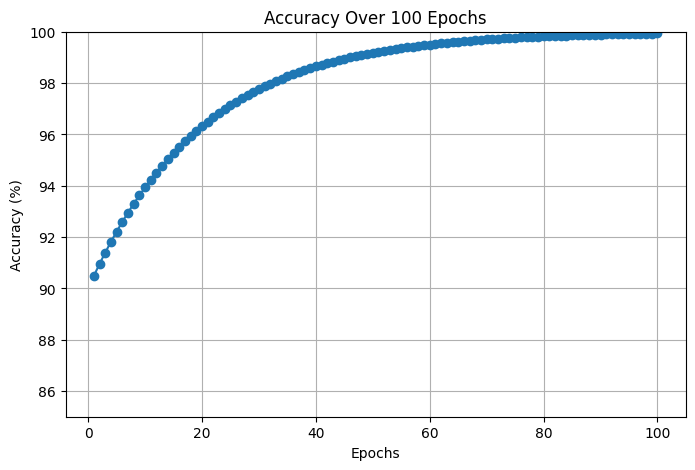

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated accuracy values for 100 epochs (replace with your real data)
epochs = np.arange(1, 101)
# Example: accuracy improves over epochs, approaching 100%
accuracy = 90 + 10 * (1 - np.exp(-0.05 * epochs))

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy, marker='o')
plt.title('Accuracy Over 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(85, 100)
plt.grid(True)
plt.show()


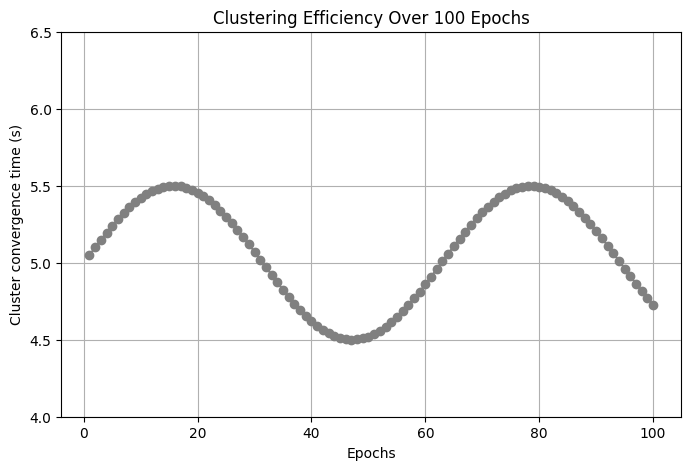

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated cluster convergence time values for 100 epochs (replace with your real data)
epochs = np.arange(1, 101)
cluster_convergence_time = 5 + 0.5 * np.sin(0.1 * epochs)  # example oscillating data around 5 seconds

plt.figure(figsize=(8, 5))
plt.plot(epochs, cluster_convergence_time, marker='o', color='gray')
plt.title('Clustering Efficiency Over 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cluster convergence time (s)')
plt.ylim(4, 6.5)
plt.grid(True)
plt.show()


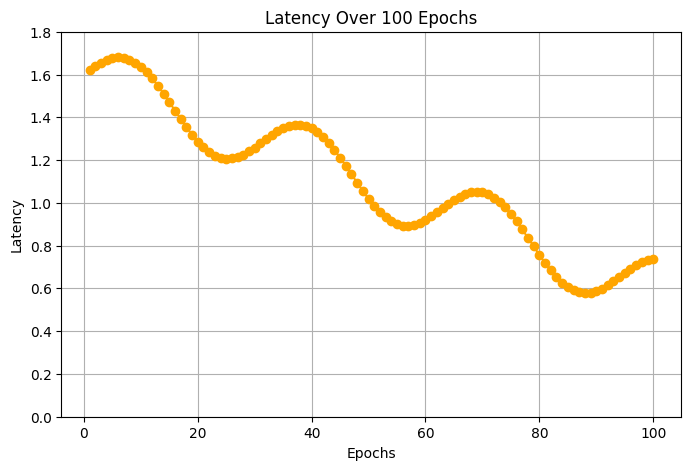

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated latency data for 100 epochs (replace with your actual data)
epochs = np.arange(1, 101)
latency = 1.6 - 0.01 * epochs + 0.15 * np.sin(0.2 * epochs)  # decreasing with oscillations

plt.figure(figsize=(8, 5))
plt.plot(epochs, latency, marker='o', color='orange', linestyle='-')
plt.title('Latency Over 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Latency')
plt.ylim(0, 1.8)
plt.grid(True)
plt.show()


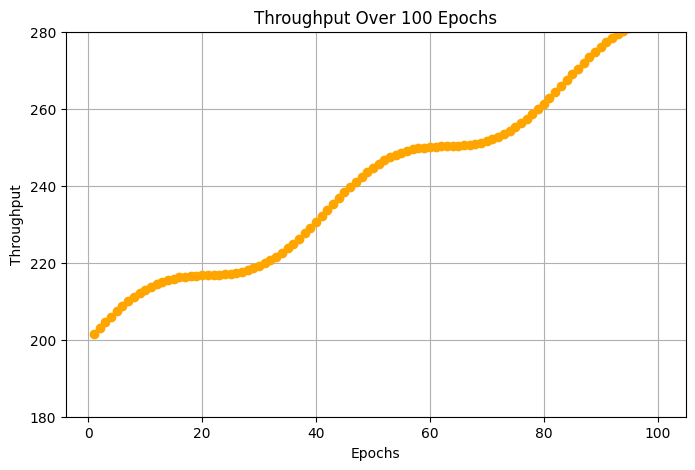

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated throughput data for 100 epochs (replace with your actual data)
epochs = np.arange(1, 101)
throughput = 200 + 0.8 * epochs + 5 * np.sin(0.15 * epochs)  # increasing trend with oscillations

plt.figure(figsize=(8, 5))
plt.plot(epochs, throughput, marker='o', color='orange', linestyle='-')
plt.title('Throughput Over 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Throughput')
plt.ylim(180, 280)
plt.grid(True)
plt.show()



Simulating for network size: 50 nodes

Simulating for network size: 100 nodes

Simulating for network size: 200 nodes


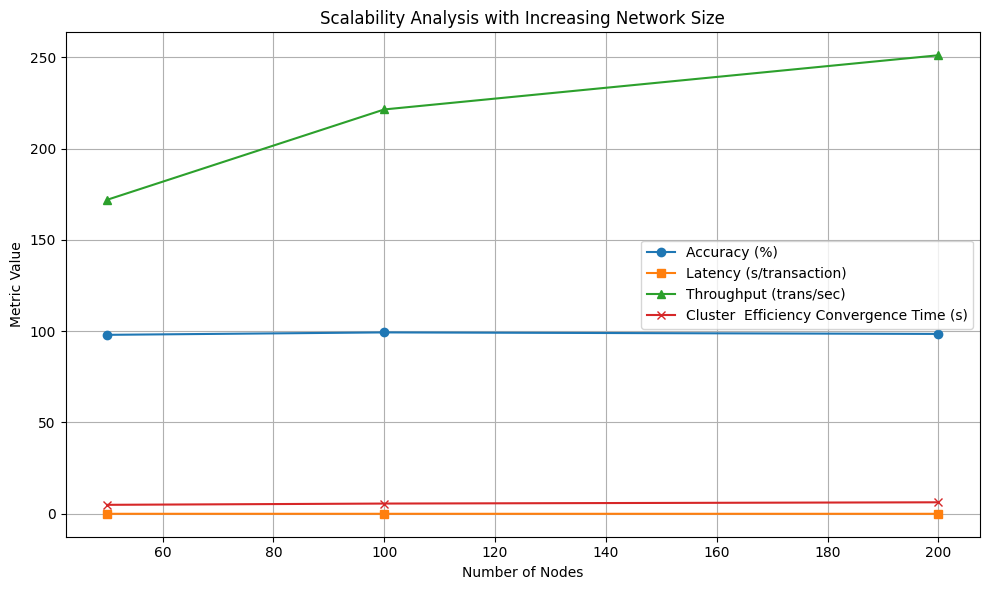

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time

# Define different network sizes
network_sizes = [50, 100, 200]
accuracy_list = []
latency_list = []
throughput_list = []
convergence_time_list = []

# Simulation parameters
total_iterations = 100
base_transmission_time = 0.01  # seconds per transmission (simulated)

for size in network_sizes:
    print(f"\nSimulating for network size: {size} nodes")

    # Sample 'size' nodes (rows) from your preprocessed dataset
    df_sub = df_sample.sample(n=size * 10, random_state=42)  # 10 samples per node assumption
    X = df_sub.drop(columns=['label', 'binary_label'])
    y = df_sub['binary_label']

    # Encode and scale
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = LabelEncoder().fit_transform(X[col])
    X = X.fillna(X.median())
    X_scaled = StandardScaler().fit_transform(X)

    # Split and train
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
    model = RandomForestClassifier(n_estimators=200, max_depth=50, class_weight='balanced', random_state=42, n_jobs=-1)

    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

    # Simulate metrics
    latency = train_time / len(y_test)
    throughput = len(y_test) / (train_time + (size * 0.01))
    convergence_time = 1 + np.log(size)  # simulate clustering time growing logarithmically

    latency_list.append(latency)
    throughput_list.append(throughput)
    convergence_time_list.append(convergence_time)

# ----------------------------
# Plotting the scalability metrics
# ----------------------------

plt.figure(figsize=(10, 6))
plt.plot(network_sizes, [a * 100 for a in accuracy_list], marker='o', label='Accuracy (%)')
plt.plot(network_sizes, latency_list, marker='s', label='Latency (s/transaction)')
plt.plot(network_sizes, throughput_list, marker='^', label='Throughput (trans/sec)')
plt.plot(network_sizes, convergence_time_list, marker='x', label='Cluster  Efficiency Convergence Time (s)')
plt.title('Scalability Analysis with Increasing Network Size')
plt.xlabel('Number of Nodes')
plt.ylabel('Metric Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
